In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('loandataset.csv')

In [3]:
dataset_copy = dataset.copy()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [5]:
dataset.drop(columns=['customer_id'],inplace=True)

In [10]:
dataset.isnull().sum()/dataset.shape[0]*100

customer_age            0.000000
customer_income         0.000000
home_ownership          0.000000
employment_duration     2.746578
loan_intent             0.000000
loan_grade              0.000000
loan_amnt               0.003069
loan_int_rate           9.562389
term_years              0.000000
historical_default     63.637759
cred_hist_length        0.000000
Current_loan_status     0.012275
dtype: float64

In [8]:
dataset.shape

(32586, 12)

In [12]:
dataset['historical_default'].head()

0      Y
1    NaN
2      N
3      N
4      Y
Name: historical_default, dtype: object

In [13]:
dataset['historical_default'].value_counts()

historical_default
Y    6128
N    5721
Name: count, dtype: int64

In [14]:
dataset.drop(columns=['historical_default'],inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  object 
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32585 non-null  object 
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   cred_hist_length     32586 non-null  int64  
 10  Current_loan_status  32582 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.7+ MB


In [16]:
dataset['customer_age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,   6,   8,   3,  58,  65,  51,
        53,  66,  61,  54,  57,  59,  62,  60,  55,  52,  64,  70,  78,
        69,  56,  73,  63,  94,  80,  84,  76,  67,  99], dtype=int64)

In [17]:
dataset['customer_age'].mean()

27.732768673663536

<Axes: ylabel='count'>

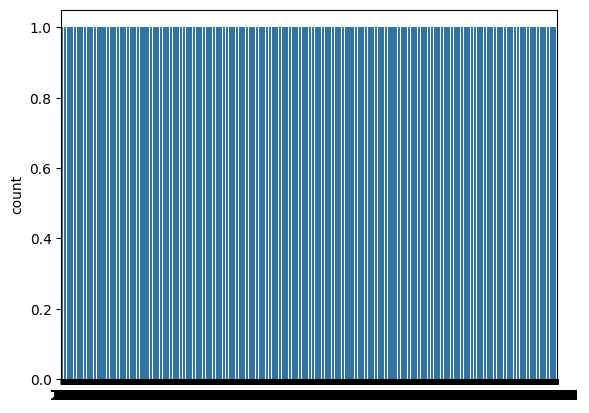

In [18]:
sns.countplot(dataset['customer_age'])

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  object 
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32585 non-null  object 
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   cred_hist_length     32586 non-null  int64  
 10  Current_loan_status  32582 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.7+ MB


In [30]:
dataset.isna().sum()

customer_age             0
customer_income          0
home_ownership           0
employment_duration    895
loan_intent              0
loan_grade               0
loan_amnt                1
loan_int_rate            0
term_years               0
cred_hist_length         0
Current_loan_status      4
dtype: int64

In [29]:
dataset['loan_int_rate'].fillna(dataset['loan_int_rate'].mean(),inplace=True)

In [32]:
dataset['employment_duration'].value_counts()

employment_duration
0.0      4105
2.0      3849
3.0      3457
5.0      2946
1.0      2915
4.0      2873
6.0      2669
7.0      2197
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      239
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

<Axes: ylabel='employment_duration'>

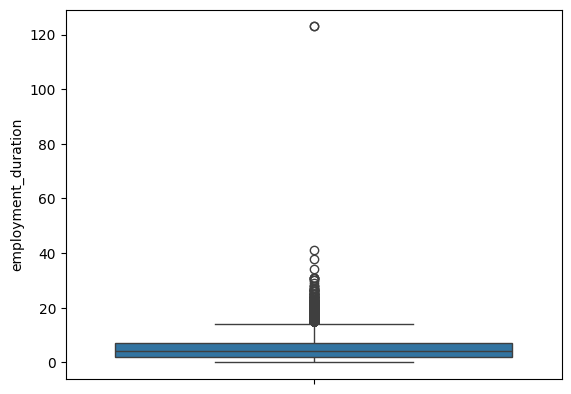

In [33]:
sns.boxplot(dataset['employment_duration'])

In [37]:
Q3_employee = dataset['employment_duration'].quantile(0.75)
Q1_employee = dataset['employment_duration'].quantile(0.25)

In [38]:
employee_IQR = Q3_employee-Q1_employee

In [39]:
upper_epm_limit = (Q3_employee + (1.5*employee_IQR))
lower_epm_limit = (Q1_employee - (1.5*employee_IQR))

In [40]:
dataset['employment_duration_out'] = np.where(dataset['employment_duration']>upper_epm_limit,upper_epm_limit,np.where(dataset['employment_duration']<lower_epm_limit,lower_epm_limit,dataset['employment_duration']))

<Axes: ylabel='employment_duration_out'>

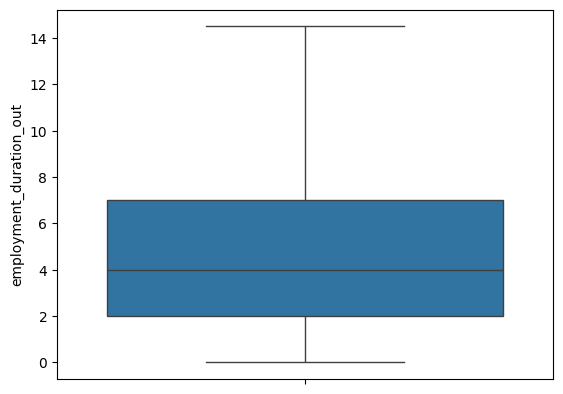

In [41]:
sns.boxplot(dataset['employment_duration_out'])

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  object 
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  31691 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.0+ MB


In [43]:
dataset['employment_duration_out'].isnull().sum()

895

In [47]:
dataset['employment_duration_out'].fillna(5,inplace=True)

C:\Users\YCS\AppData\Local\Temp\ipykernel_3528\3088020539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['employment_duration_out'].fillna(5,inplace=True)


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  object 
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  32586 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.0+ MB


<Axes: ylabel='customer_age'>

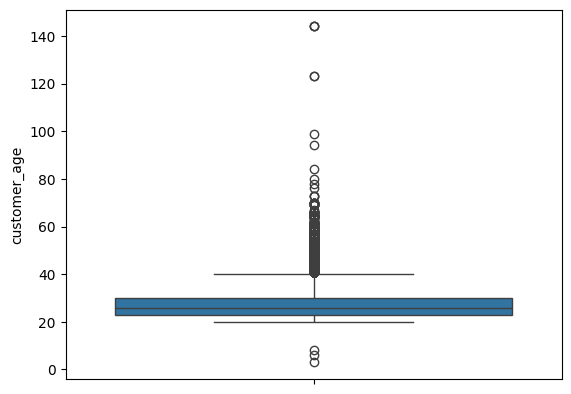

In [50]:
sns.boxplot(dataset['customer_age'])

In [51]:
Q3_age = dataset['customer_age'].quantile(0.75)
Q1_age = dataset['customer_age'].quantile(0.25)
age_IQR = Q3_age-Q1_age
upper_age_limit = (Q3_age + (1.5*age_IQR))
lower_age_limit = (Q1_age - (1.5*age_IQR))
dataset['customer_age_out'] = np.where(dataset['customer_age']>upper_age_limit,upper_age_limit,np.where(dataset['customer_age']<lower_age_limit,lower_age_limit,dataset['customer_age']))

<Axes: ylabel='customer_age_out'>

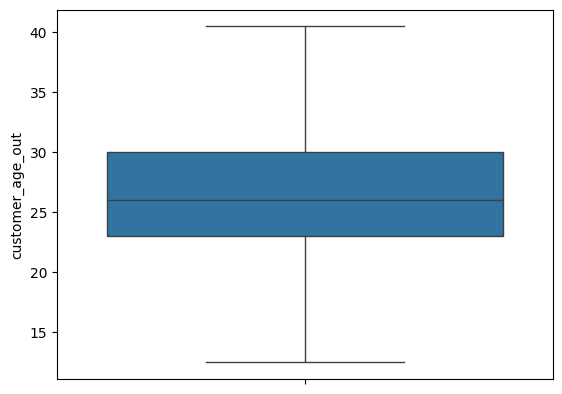

In [52]:
sns.boxplot(dataset['customer_age_out'])

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  object 
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  32586 non-null  float64
 12  customer_age_out         32586 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 3.2+ MB


In [55]:
dataset['customer_income'].head()

0    59000
1     9600
2     9600
3    65500
4    54400
Name: customer_income, dtype: object

In [58]:
dataset['customer_income'].isnull().sum()

0

In [72]:
dataset['customer_income'] = dataset['customer_income'].apply(lambda x: x.replace(',',''))

In [73]:
dataset['customer_income'] = dataset['customer_income'].astype('float')

In [75]:
dataset['customer_income'].isnull().sum()

0

In [76]:
dataset['customer_income'].mean()

66076.371386485

<Axes: ylabel='customer_income'>

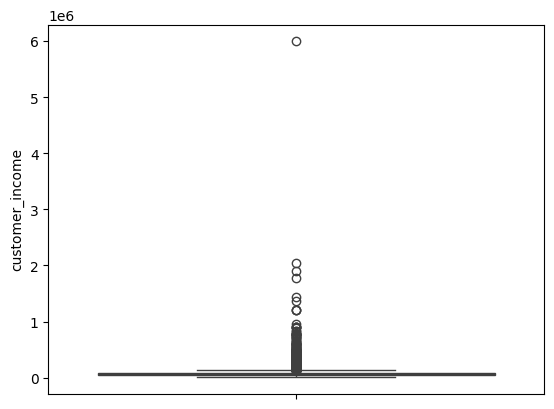

In [77]:
sns.boxplot(dataset['customer_income'])

In [80]:
dataset['customer_income'].mean()

66076.371386485

In [81]:
Q3_income = dataset['customer_income'].quantile(0.75)
Q1_income = dataset['customer_income'].quantile(0.25)
income_IQR = Q3_income-Q1_income
upper_income_limit = (Q3_income + (1.5*income_IQR))
lower_income_limit = (Q1_income - (1.5*income_IQR))
dataset['customer_income_out'] = np.where(dataset['customer_income']>upper_income_limit,upper_income_limit,np.where(dataset['customer_income']<lower_income_limit,lower_income_limit,dataset['customer_income']))

In [84]:
dataset['customer_income_out'].mean()

62421.296630454795

<Axes: ylabel='customer_income_out'>

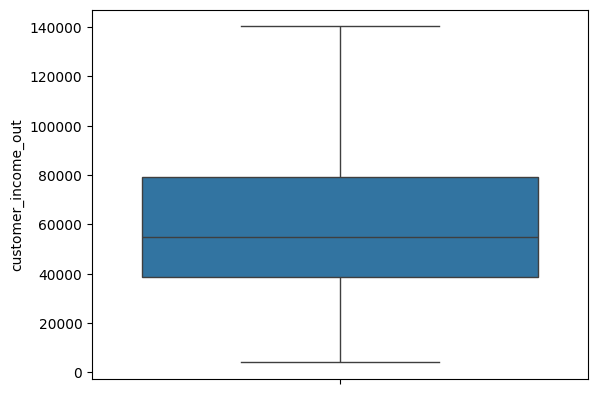

In [85]:
sns.boxplot(dataset['customer_income_out'])

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  float64
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  32586 non-null  float64
 12  customer_age_out         32586 non-null  float64
 13  customer_income_out      32586 non-null  float64
dtypes: float64(6), int64(3

In [88]:
dataset['home_ownership'].head()

0        RENT
1         OWN
2    MORTGAGE
3        RENT
4        RENT
Name: home_ownership, dtype: object

In [89]:
dataset['home_ownership'].value_counts()

home_ownership
RENT        16451
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [90]:
dataset['home_ownership'].isnull().sum()

0

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  float64
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  32586 non-null  float64
 12  customer_age_out         32586 non-null  float64
 13  customer_income_out      32586 non-null  float64
dtypes: float64(6), int64(3

In [92]:
dataset['loan_intent'].head()

0     PERSONAL
1    EDUCATION
2      MEDICAL
3      MEDICAL
4      MEDICAL
Name: loan_intent, dtype: object

In [93]:
dataset['loan_intent'].value_counts()

loan_intent
EDUCATION            6454
MEDICAL              6072
VENTURE              5718
PERSONAL             5523
DEBTCONSOLIDATION    5213
HOMEIMPROVEMENT      3606
Name: count, dtype: int64

In [94]:
dataset['loan_intent'].isnull().sum()

0

In [95]:
dataset['Current_loan_status'].head()

0       DEFAULT
1    NO DEFAULT
2       DEFAULT
3       DEFAULT
4       DEFAULT
Name: Current_loan_status, dtype: object

In [96]:
dataset['Current_loan_status'].isnull().sum()

4

In [98]:
dataset['Current_loan_status'].fillna(dataset['Current_loan_status'].mode(),inplace=True)

In [99]:
dataset['Current_loan_status'].value_counts()

Current_loan_status
NO DEFAULT    25742
DEFAULT        6840
Name: count, dtype: int64

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  float64
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  32586 non-null  float64
 12  customer_age_out         32586 non-null  float64
 13  customer_income_out      32586 non-null  float64
dtypes: float64(6), int64(3

In [101]:
dataset['loan_grade'].head()

0    C
1    A
2    B
3    B
4    B
Name: loan_grade, dtype: object

In [102]:
dataset['loan_grade'].value_counts()

loan_grade
A    15661
B     9065
C     4926
D     2629
E      305
Name: count, dtype: int64

In [103]:
dataset['loan_grade'].isnull().sum()

0

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             32586 non-null  int64  
 1   customer_income          32586 non-null  float64
 2   home_ownership           32586 non-null  object 
 3   employment_duration      31691 non-null  float64
 4   loan_intent              32586 non-null  object 
 5   loan_grade               32586 non-null  object 
 6   loan_amnt                32585 non-null  object 
 7   loan_int_rate            32586 non-null  float64
 8   term_years               32586 non-null  int64  
 9   cred_hist_length         32586 non-null  int64  
 10  Current_loan_status      32582 non-null  object 
 11  employment_duration_out  32586 non-null  float64
 12  customer_age_out         32586 non-null  float64
 13  customer_income_out      32586 non-null  float64
dtypes: float64(6), int64(3

In [105]:
dataset['loan_amnt'].head()

0    £35,000.00
1     £1,000.00
2     £5,500.00
3    £35,000.00
4    £35,000.00
Name: loan_amnt, dtype: object

In [120]:
dataset['loan_amnt'].fillna(dataset['loan_amnt'].mode())

1

In [119]:
dataset['loan_amnt'].isnull().sum()

1

In [121]:
dataset['loan_amnt']=dataset['loan_amnt']

In [122]:
dataset['loan_amnt'].isnull().sum()

1

In [127]:
dataset.isnull().sum()

home_ownership             0
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate              0
term_years                 0
cred_hist_length           0
Current_loan_status        4
employment_duration_out    0
customer_age_out           0
customer_income_out        0
dtype: int64

In [125]:
dataset.drop(columns=['customer_income','customer_age','employment_duration'],inplace=True)

In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_ownership           32586 non-null  object 
 1   loan_intent              32586 non-null  object 
 2   loan_grade               32586 non-null  object 
 3   loan_amnt                32585 non-null  object 
 4   loan_int_rate            32586 non-null  float64
 5   term_years               32586 non-null  int64  
 6   cred_hist_length         32586 non-null  int64  
 7   Current_loan_status      32582 non-null  object 
 8   employment_duration_out  32586 non-null  float64
 9   customer_age_out         32586 non-null  float64
 10  customer_income_out      32586 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


In [128]:
dataset['Current_loan_status'].head()

0       DEFAULT
1    NO DEFAULT
2       DEFAULT
3       DEFAULT
4       DEFAULT
Name: Current_loan_status, dtype: object

In [130]:
dataset['Current_loan_status'].fillna(dataset['Current_loan_status'].mode(),inplace=True)

In [131]:
dataset.isnull().sum()

home_ownership             0
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate              0
term_years                 0
cred_hist_length           0
Current_loan_status        4
employment_duration_out    0
customer_age_out           0
customer_income_out        0
dtype: int64

In [134]:
dataset.dropna(inplace=True)

In [135]:
dataset.isnull().sum()

home_ownership             0
loan_intent                0
loan_grade                 0
loan_amnt                  0
loan_int_rate              0
term_years                 0
cred_hist_length           0
Current_loan_status        0
employment_duration_out    0
customer_age_out           0
customer_income_out        0
dtype: int64

In [143]:
dataset['loan_amnt'] = dataset['loan_amnt'].apply(lambda x: x.replace('£','').replace(',',''))

In [144]:
dataset['loan_amnt'] = dataset['loan_amnt'].astype('float')

In [149]:
dataset.shape

(32581, 11)

In [150]:
Q3_load_amt = dataset['loan_amnt'].quantile(0.75)
Q1_load_amt = dataset['loan_amnt'].quantile(0.25)
load_amt_IQR = Q3_load_amt-Q1_load_amt
upper_load_amt = (Q3_load_amt + (1.5*load_amt_IQR))
lower_load_amt = (Q1_load_amt - (1.5*load_amt_IQR))
dataset['loan_amnt_out'] = np.where(dataset['loan_amnt']>upper_load_amt,upper_load_amt,np.where(dataset['loan_amnt']<lower_load_amt,lower_load_amt,dataset['loan_amnt']))

<Axes: ylabel='loan_amnt_out'>

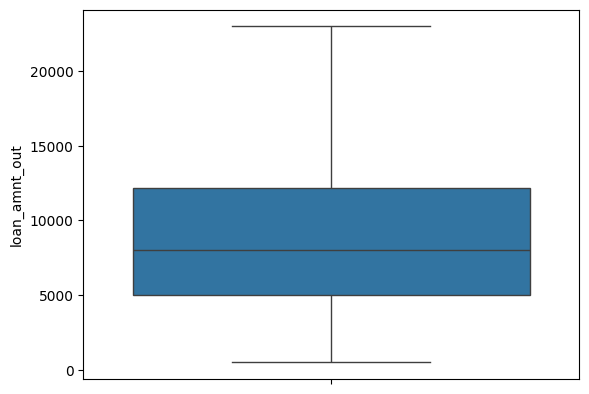

In [151]:
sns.boxplot(dataset['loan_amnt_out'])

In [152]:
dataset['loan_amnt_out'].mean()

9408.431294312637

In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_ownership           32581 non-null  object 
 1   loan_intent              32581 non-null  object 
 2   loan_grade               32581 non-null  object 
 3   loan_amnt                32581 non-null  float64
 4   loan_int_rate            32581 non-null  float64
 5   term_years               32581 non-null  int64  
 6   cred_hist_length         32581 non-null  int64  
 7   Current_loan_status      32581 non-null  object 
 8   employment_duration_out  32581 non-null  float64
 9   customer_age_out         32581 non-null  float64
 10  customer_income_out      32581 non-null  float64
 11  loan_amnt_out            32581 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 3.2+ MB


In [154]:
dataset['loan_int_rate'].head()

0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
Name: loan_int_rate, dtype: float64

<Axes: ylabel='loan_int_rate'>

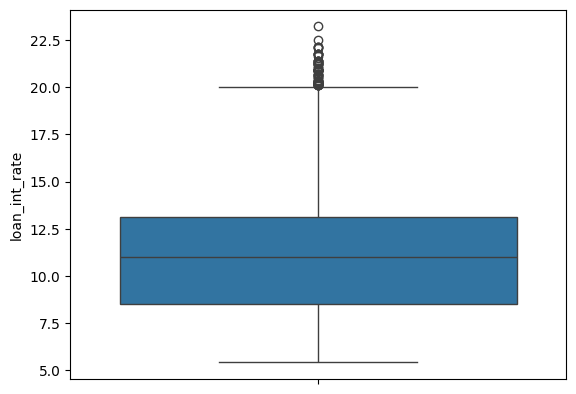

In [156]:
sns.boxplot(dataset['loan_int_rate'])

In [157]:
Q3_loan_int_rate = dataset['loan_int_rate'].quantile(0.75)
Q1_loan_int_rate = dataset['loan_int_rate'].quantile(0.25)
loan_int_rate_IQR = Q3_loan_int_rate-Q1_loan_int_rate
upper_loan_int_rate = (Q3_loan_int_rate + (1.5*loan_int_rate_IQR))
lower_loan_int_rate = (Q1_loan_int_rate - (1.5*loan_int_rate_IQR))
dataset['loan_int_rate_out'] = np.where(dataset['loan_int_rate']>upper_loan_int_rate,upper_loan_int_rate,np.where(dataset['loan_int_rate']<lower_loan_int_rate,lower_loan_int_rate,dataset['loan_int_rate']))

<Axes: ylabel='loan_int_rate_out'>

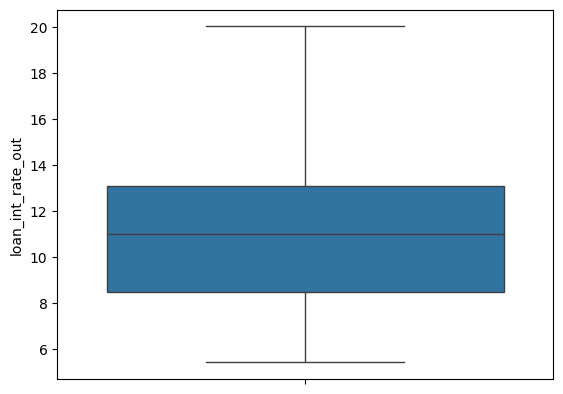

In [159]:
sns.boxplot(dataset['loan_int_rate_out'])

In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_ownership           32581 non-null  object 
 1   loan_intent              32581 non-null  object 
 2   loan_grade               32581 non-null  object 
 3   loan_amnt                32581 non-null  float64
 4   loan_int_rate            32581 non-null  float64
 5   term_years               32581 non-null  int64  
 6   cred_hist_length         32581 non-null  int64  
 7   Current_loan_status      32581 non-null  object 
 8   employment_duration_out  32581 non-null  float64
 9   customer_age_out         32581 non-null  float64
 10  customer_income_out      32581 non-null  float64
 11  loan_amnt_out            32581 non-null  float64
 12  loan_int_rate_out        32581 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 3.5+ MB


In [161]:
dataset.drop(columns=['loan_amnt','loan_int_rate'],inplace=True)

In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_ownership           32581 non-null  object 
 1   loan_intent              32581 non-null  object 
 2   loan_grade               32581 non-null  object 
 3   term_years               32581 non-null  int64  
 4   cred_hist_length         32581 non-null  int64  
 5   Current_loan_status      32581 non-null  object 
 6   employment_duration_out  32581 non-null  float64
 7   customer_age_out         32581 non-null  float64
 8   customer_income_out      32581 non-null  float64
 9   loan_amnt_out            32581 non-null  float64
 10  loan_int_rate_out        32581 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.0+ MB


In [163]:
dataset['home_ownership'].head()

0        RENT
1         OWN
2    MORTGAGE
3        RENT
4        RENT
Name: home_ownership, dtype: object

In [164]:
dataset['home_ownership'].isnull().sum()

0

In [165]:
dataset['home_ownership_out'] = dataset['home_ownership']

In [166]:
dataset.drop(columns=['home_ownership'],inplace=True)

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_intent              32581 non-null  object 
 1   loan_grade               32581 non-null  object 
 2   term_years               32581 non-null  int64  
 3   cred_hist_length         32581 non-null  int64  
 4   Current_loan_status      32581 non-null  object 
 5   employment_duration_out  32581 non-null  float64
 6   customer_age_out         32581 non-null  float64
 7   customer_income_out      32581 non-null  float64
 8   loan_amnt_out            32581 non-null  float64
 9   loan_int_rate_out        32581 non-null  float64
 10  home_ownership_out       32581 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 3.0+ MB


In [168]:
dataset['loan_intent'].head()

0     PERSONAL
1    EDUCATION
2      MEDICAL
3      MEDICAL
4      MEDICAL
Name: loan_intent, dtype: object

In [169]:
dataset['loan_intent'].isnull().sum()

0

In [170]:
dataset['loan_intent_out'] = dataset['loan_intent']

In [171]:
dataset.drop(columns=['loan_intent'],inplace=True)

In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_grade               32581 non-null  object 
 1   term_years               32581 non-null  int64  
 2   cred_hist_length         32581 non-null  int64  
 3   Current_loan_status      32581 non-null  object 
 4   employment_duration_out  32581 non-null  float64
 5   customer_age_out         32581 non-null  float64
 6   customer_income_out      32581 non-null  float64
 7   loan_amnt_out            32581 non-null  float64
 8   loan_int_rate_out        32581 non-null  float64
 9   home_ownership_out       32581 non-null  object 
 10  loan_intent_out          32581 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 3.0+ MB


In [173]:
dataset['loan_grade'].head()

0    C
1    A
2    B
3    B
4    B
Name: loan_grade, dtype: object

In [174]:
dataset['loan_grade'].isnull().sum()

0

In [175]:
dataset['loan_grade_out'] = dataset['loan_grade']

In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_grade               32581 non-null  object 
 1   term_years               32581 non-null  int64  
 2   cred_hist_length         32581 non-null  int64  
 3   Current_loan_status      32581 non-null  object 
 4   employment_duration_out  32581 non-null  float64
 5   customer_age_out         32581 non-null  float64
 6   customer_income_out      32581 non-null  float64
 7   loan_amnt_out            32581 non-null  float64
 8   loan_int_rate_out        32581 non-null  float64
 9   home_ownership_out       32581 non-null  object 
 10  loan_intent_out          32581 non-null  object 
 11  loan_grade_out           32581 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 3.2+ MB


In [177]:
dataset['term_years'].head()

0    10
1     1
2     5
3    10
4    10
Name: term_years, dtype: int64

<Axes: ylabel='term_years'>

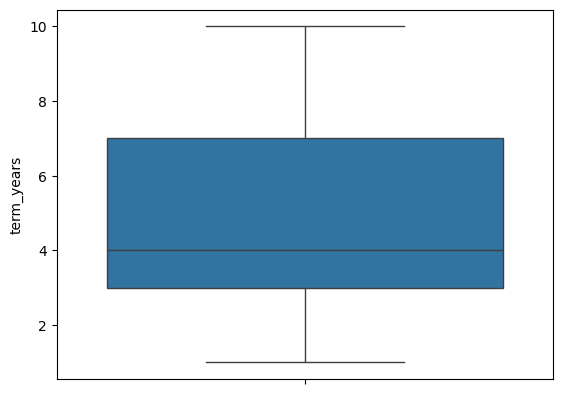

In [178]:
sns.boxplot(dataset['term_years'])

In [179]:
dataset['term_years_out'] = dataset['term_years']

In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_grade               32581 non-null  object 
 1   term_years               32581 non-null  int64  
 2   cred_hist_length         32581 non-null  int64  
 3   Current_loan_status      32581 non-null  object 
 4   employment_duration_out  32581 non-null  float64
 5   customer_age_out         32581 non-null  float64
 6   customer_income_out      32581 non-null  float64
 7   loan_amnt_out            32581 non-null  float64
 8   loan_int_rate_out        32581 non-null  float64
 9   home_ownership_out       32581 non-null  object 
 10  loan_intent_out          32581 non-null  object 
 11  loan_grade_out           32581 non-null  object 
 12  term_years_out           32581 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 3.5+ MB


In [181]:
dataset['cred_hist_length'].head()

0    3
1    2
2    3
3    2
4    4
Name: cred_hist_length, dtype: int64

In [182]:
dataset['cred_hist_length'].isnull().sum()

0

In [183]:
dataset['cred_hist_length_out'] = dataset['cred_hist_length']

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_grade               32581 non-null  object 
 1   term_years               32581 non-null  int64  
 2   cred_hist_length         32581 non-null  int64  
 3   Current_loan_status      32581 non-null  object 
 4   employment_duration_out  32581 non-null  float64
 5   customer_age_out         32581 non-null  float64
 6   customer_income_out      32581 non-null  float64
 7   loan_amnt_out            32581 non-null  float64
 8   loan_int_rate_out        32581 non-null  float64
 9   home_ownership_out       32581 non-null  object 
 10  loan_intent_out          32581 non-null  object 
 11  loan_grade_out           32581 non-null  object 
 12  term_years_out           32581 non-null  int64  
 13  cred_hist_length_out     32581 non-null  int64  
dtypes: float64(5), int64(4), ob

In [185]:
dataset.drop(columns=['loan_grade','term_years','cred_hist_length'],inplace=True)

In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Current_loan_status      32581 non-null  object 
 1   employment_duration_out  32581 non-null  float64
 2   customer_age_out         32581 non-null  float64
 3   customer_income_out      32581 non-null  float64
 4   loan_amnt_out            32581 non-null  float64
 5   loan_int_rate_out        32581 non-null  float64
 6   home_ownership_out       32581 non-null  object 
 7   loan_intent_out          32581 non-null  object 
 8   loan_grade_out           32581 non-null  object 
 9   term_years_out           32581 non-null  int64  
 10  cred_hist_length_out     32581 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.0+ MB


In [190]:
dataset['Current_loan_status'].head()

0       DEFAULT
1    NO DEFAULT
2       DEFAULT
3       DEFAULT
4       DEFAULT
Name: Current_loan_status, dtype: object

In [201]:
dataset.to_csv('clean_loan_dataset.csv')

In [191]:
x = dataset.drop(columns=['Current_loan_status'])
y = dataset['Current_loan_status']

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Current_loan_status      32581 non-null  object 
 1   employment_duration_out  32581 non-null  float64
 2   customer_age_out         32581 non-null  float64
 3   customer_income_out      32581 non-null  float64
 4   loan_amnt_out            32581 non-null  float64
 5   loan_int_rate_out        32581 non-null  float64
 6   home_ownership_out       32581 non-null  object 
 7   loan_intent_out          32581 non-null  object 
 8   loan_grade_out           32581 non-null  object 
 9   term_years_out           32581 non-null  int64  
 10  cred_hist_length_out     32581 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.0+ MB


In [194]:
numeric_cols = ['employment_duration_out','customer_age_out','customer_income_out','loan_amnt_out','loan_int_rate_out','term_years_out','cred_hist_length_out']
categorical_cols = ['home_ownership_out','loan_intent_out','loan_grade_out']

In [195]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [197]:
preprocess = ColumnTransformer(transformers=[
    ('numeric_impute',StandardScaler(),numeric_cols),
    ('categorical_preprocess',OneHotEncoder(),categorical_cols),
],remainder='passthrough')

In [198]:
label_encode = LabelEncoder()

In [199]:
y = label_encode.fit_transform(y)

In [202]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
model = Pipeline(steps=[
    ('preprocessing',preprocess),
    ('model',RandomForestClassifier(max_depth=10))
])

In [205]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_impute',
                                                  StandardScaler(),
                                                  ['employment_duration_out',
                                                   'customer_age_out',
                                                   'customer_income_out',
                                                   'loan_amnt_out',
                                                   'loan_int_rate_out',
                                                   'term_years_out',
                                                   'cred_hist_length_out']),
                                                 ('categorical_preprocess',
                                                  OneHotEncoder(),
                                                  ['home_ownership_out',
                                                   'loan_intent_out',
                                                   'loan_grade_out'])])),
                ('model', RandomForestClassifier(max_depth=10))])

In [206]:
predictions = model.predict(x_test)

In [208]:
from sklearn.metrics import accuracy_score

In [209]:
accuracy_score(y_test,predictions)

0.9024240564590366